# Investigate WeRateDogs dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data overview:
This project Include gatherin data from three different sources:

- WeRateDogs Twitter archive:
The twitter archive contains basic information about each tweet
- Image Predictions File:
The image predictions file contained by running every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs
- Data via the Twitter API

### Project Aim:
Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

### Questions:
The following questions are aimed to be answered by the outcome of the analysis:
   - What's the most common dog breed?
   - What's the most common dog stage?
   - What's the dog breed and stage associated with the most favourited tweet?
   - What's the dog breed and stage associated with the most retweeted tweet?

<a id='wrangling'></a>
# Data Wrangling

## Gather:

In [1]:
# import necessary libraries and packages
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# import the twitter-archive-enhanced file into a data frame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# check the file was imported correctly
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
# download image_predections file using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# save the file into CSV
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# import the downloaded file into a data frame
image_predictions = pd.read_csv('image_predictions.tsv', '\t')

In [7]:
# confirm the file was imported successfully
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [9]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [10]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [12]:
# read tweet-json file line by line to extract the necessary data
with open('tweet-json.txt', 'r') as f:
    tweet_json = pd.read_json(f, lines=True)
tweet_json = tweet_json[['id','favorite_count','retweet_count', 'in_reply_to_status_id']]
tweet_json.head(1)

,id,favorite_count,retweet_count,in_reply_to_status_id
0,892420643555336193,39467,8853,NaN


## Assess

In [13]:
# assess twitter archive visually
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
# visual assessment
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
# Visual assessment
tweet_json

,id,favorite_count,retweet_count,in_reply_to_status_id
0,892420643555336193,39467,8853,NaN
1,892177421306343426,33819,6514,NaN
2,891815181378084864,25461,4328,NaN
3,891689557279858688,42908,8964,NaN
4,891327558926688256,41048,9774,NaN
...,...,...,...,...
2349,666049248165822465,111,41,NaN
2350,666044226329800704,311,147,NaN
2351,666033412701032449,128,47,NaN
2352,666029285002620928,132,48,NaN


#### Programmatic Assessment

In [16]:
# display a concise summary of the twitter archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
# display a concise summary of immage predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# display a concise summary of tweet json
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2354 non-null   int64  
 1   favorite_count         2354 non-null   int64  
 2   retweet_count          2354 non-null   int64  
 3   in_reply_to_status_id  78 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 73.7 KB


In [19]:
# display summary statistics of numeric values in twitter archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# display summary statistics of numeric values in image predictions
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
# display summary statistics of numeric values in tweet json
tweet_json.describe()

,id,favorite_count,retweet_count,in_reply_to_status_id
count,2.354000e+03,2354.000000,2354.000000,7.800000e+01
mean,7.426978e+17,8080.968564,3164.797366,7.455079e+17
std,6.852812e+16,11814.771334,5284.770364,7.582492e+16
min,6.660209e+17,0.000000,0.000000,6.658147e+17
25%,6.783975e+17,1415.000000,624.500000,6.757419e+17
50%,7.194596e+17,3603.500000,1473.500000,7.038708e+17
75%,7.993058e+17,10122.250000,3652.000000,8.257804e+17
max,8.924206e+17,132810.000000,79515.000000,8.862664e+17


In [22]:
# display a random sample of size 5 from the twitter archive
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He's just saying hi. That's al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966...,12,10,Dakota,None,None,None,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Please only send in dogs. We on...,8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None
2322,666430724426358785,NaN,NaN,2015-11-17 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666430724...,6,10,None,None,None,None,None
1567,687826841265172480,NaN,NaN,2016-01-15 02:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a rollercoaster of emotion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,None,None,None,None
1884,674800520222154752,NaN,NaN,2015-12-10 03:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674800520...,11,10,Tedders,None,None,None,None


In [23]:
# display a random sample of size 5 from the image predictions
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2002,876838120628539392,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,0.000030,False,agama,0.000022,False
1792,830956169170665475,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,golden_retriever,0.317196,True,English_setter,0.132759,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1282,750383411068534784,https://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg,1,Border_collie,0.672791,True,collie,0.270188,True,papillon,0.034504,True


In [24]:
# display a random sample of size 5 from the tweet json
tweet_json.sample(5)

,id,favorite_count,retweet_count,in_reply_to_status_id
1363,702684942141153280,3516,1215,NaN
770,776813020089548800,5444,1405,NaN
407,823581115634085888,14376,3031,NaN
1123,730196704625098752,5339,2172,NaN
1132,728653952833728512,3620,1169,NaN


In [25]:
# check for duplicated values
twitter_archive.tweet_id.duplicated().sum()

0

In [26]:
# sort numerator values to detect if there're outliers or inaccurate values
twitter_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [27]:
# sort denominator values to detect if there're outliers or inaccurate values
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [28]:
# check for inaccurate values in name column
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [29]:
# check for duplicates
image_predictions.duplicated().sum()

0

In [30]:
# check for duplicates
tweet_json.id.duplicated().sum()

0

In [31]:
# check values for dog breed predictions
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
grey_fox                1
standard_schnauzer      1
fountain                1
tailed_frog             1
Scotch_terrier          1
Name: p1, Length: 378, dtype: int64

In [32]:
# identify shape of twitter archive data frame
twitter_archive.shape

(2356, 17)

In [33]:
# identify shape of image predictions data frame
image_predictions.shape

(2075, 12)

In [34]:
# identify shape of tweet json data frame
tweet_json.shape

(2354, 4)

In [35]:
# list the column names in twitter archive
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality:
#### Twitter Archive
- missing values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls` columns 
- inaccurate values in `name` column
- missing values in the dog stage columns represented as None
- erroneous data types (`timestamp` column)
- inaccurate values in `rating_numerator`, `rating_denominator` columns
- include retweets which mean there are duplicates
- source column contain `HTML` tags
#### Image Predections
- multiple columns for dog breeds.
#### Tweet Json
- include retweets which mean there are duplicates

### Tidiness
- multiple columns representing the dog stage (`doggo`, `floofer`, `pupper`, `puppo`)
- `tweet_id` column represented as `tweet_id` in twitter_archive and image_predictions data frames and as `id` in tweet_json data frame

## Clean

In [36]:
# Create copies of datasets to perform the cleaning tasks on them
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweets_clean = tweet_json.copy()

### Twitter Archive

1. missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns.
2. include retweets which mean there are duplicates.
3. source column contain HTML tags.

#### Define:
- Delete retweeted records

#### Clean:

In [37]:
# detect and drop retweets
archive_clean = archive_clean.drop(archive_clean[(archive_clean['in_reply_to_status_id'].isnull() == False) |
                                                       (archive_clean['retweeted_status_id'].isnull() == False)].index)

#### Test:

In [38]:
# check all retweets are successfully dropped
archive_clean['in_reply_to_status_id'].unique()

array([nan])

In [39]:
archive_clean['retweeted_status_id'].unique()

array([nan])

In [40]:
archive_clean.shape

(2097, 17)

#### Define:
- Drop the columns that won't be needed for the analysis (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls` and `source` columns)
#### Clean:

In [41]:
# drop irrelevant columns
archive_clean = archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                                  'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 
                                                  'source'])

#### Test:

In [42]:
# check the column were successfully dropped
archive_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


1. multiple columns representing the dog stage (doggo, floofer, pupper, puppo).
2. missing values in the dog stage columns represented as None

#### Define:
- handle none by replacing it with empty string
- merge the 4 columns into one dog stage column
- handle multiple stages
- handle missing values by replacing them with NaNs
- drop the original columns leaving new dog stage only
- convert dog stage column data type into categorical.
#### Clean:

In [43]:
# handle none
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [44]:
# merge into dog stage column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [45]:
# handle multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [46]:
# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [47]:
# drop the unnessecary columns
archive_clean = archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo']) 

In [48]:
# change dog stages into categorical data type
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

#### Test:

In [49]:
# check the dog stage column was successfully created and the other columns were dropped
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [50]:
# check the data type was sucessfully changed
archive_clean.dtypes

tweet_id                 int64
timestamp               object
text                    object
rating_numerator         int64
rating_denominator       int64
name                    object
dog_stage             category
dtype: object

####  inaccurate values in `name` column.
#### Define:
- replace the inaccurate names with NaNs
#### Clean:

In [51]:
# create a mask of the data frame to detect innacurate name values and change them to NaNs
mask = archive_clean.name.str.islower()
column_name = 'name'
archive_clean.loc[mask, column_name] = np.nan

In [52]:
# change the innacurate name values to NaNs
archive_clean.name.replace('None', '', inplace=True)
archive_clean.loc[archive_clean.name == '', 'name'] = np.nan

#### Test:

In [53]:
# check the inaccurate values were successfully changed to NaNs
archive_clean.name.isnull().any()

True

In [54]:
# check there's no None name in the data frame
archive_clean.query('name == "None"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage


In [55]:
archive_clean.name.value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny       9
           ..
Bronte      1
Rinna       1
Tripp       1
Dante       1
Moofasa     1
Name: name, Length: 929, dtype: int64

In [56]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


#### inaccurate values in `rating_numerator`, `rating_denominator` columns
#### Define:
- Re-extract the numerator and denominator from the text by regular expressions
#### Clean:

In [57]:
# re-extract the numerator and denomenator using regular expression
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [58]:
# assign the extracted numerator values to its column in the data frame
archive_clean.rating_numerator = ratings[0].astype(float)

In [59]:
# assign the extracted denominator values to its column in the data frame
archive_clean.rating_denominator = ratings[1].astype('int64')

#### Test:

In [60]:
archive_clean.rating_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.100e+01, 6.000e+00,
       1.000e+01, 0.000e+00, 8.400e+01, 2.400e+01, 9.750e+00, 5.000e+00,
       1.127e+01, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 4.000e+00,
       1.650e+02, 1.776e+03, 2.040e+02, 5.000e+01, 9.900e+01, 8.000e+01,
       4.500e+01, 6.000e+01, 4.400e+01, 1.210e+02, 1.126e+01, 2.000e+00,
       1.440e+02, 8.800e+01, 1.000e+00, 4.200e+02])

In [61]:
archive_clean.rating_denominator.unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,
         2], dtype=int64)

#### erroneous data types (timestamp column)
#### Define:
- convert timestamp data type from string to datetime object
#### Clean:

In [62]:
# change the timestamp column into datetime object
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test:

In [63]:
# check the data type successfully changed
archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
text                               object
rating_numerator                  float64
rating_denominator                  int64
name                               object
dog_stage                        category
dtype: object

### Image predections
#### Multiple columns for dog breeds
#### Define:
- create one dog breed column 
- drop all dog breeds predection columns
#### Clean:

In [64]:
# create dog breed column based on image predictions
dog_breed = []
for i in range(image_clean.shape[0]):
    if image_clean['p1_dog'][i] == True:
        dog_breed.append(image_clean['p1'][i])
    elif image_clean['p2_dog'][i] == True:
        dog_breed.append(image_clean['p2'][i])
    elif image_clean['p3_dog'][i] == True:
        dog_breed.append(image_clean['p3'][i])
    else:
        dog_breed.append('')

In [65]:
# assign values to a new column calle dog breed
image_clean['dog_breed'] = dog_breed

In [66]:
# assign Nans to the dogs who don't have accurate image predictions
image_clean.loc[image_clean.dog_breed == '', 'dog_breed'] = np.nan

In [67]:
# drop the unnecessary columns
image_clean = image_clean.drop(columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

#### Test:

In [68]:
# check the  column was successfully created and the other columns were dropped
image_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Tweet json
#### include retweets which mean there are duplicates
#### Define:
- Delete retweeted records
#### Clean:

In [69]:
# check and drop retweets
tweets_clean = tweets_clean.drop(tweets_clean[(tweets_clean['in_reply_to_status_id'].isnull() == False)].index)

#### Test:

In [70]:
# check all the retweets were dropped
tweets_clean['in_reply_to_status_id'].unique()

array([nan])

In [71]:
tweets_clean.shape

(2276, 4)

#### Define:
- drop `in_reply_to_status_id` column

#### Clean:

In [72]:
# drop the in replay to status id since it's no longer needed
tweets_clean.drop(columns = ['in_reply_to_status_id'], inplace=True)

#### Test:

In [73]:
# check the column was successfully dropped
tweets_clean.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853


#### tweet_id column represented as tweet_id in twitter_archive and image_predictions data frames and as id in tweet_json data frame
#### Define:
- rename id column in tweet json data frame

#### Clean:

In [74]:
# rename the id column in the tweet json to match tweed id column in the other data frames to perfom merging on it
tweets_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test:

In [75]:
# check the name was successfully changed
tweets_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853


#### Define:
- merge 3 data frames together to form one master data frame

#### Clean:

In [76]:
# merge the data frames to create a master dataframe
twitter_archive_master = archive_clean.merge(image_clean.set_index('tweet_id'),on='tweet_id').merge(tweets_clean.set_index('tweet_id'),on='tweet_id')

#### Test:

In [77]:
# check the data frame was successfully created
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,41048,9774


### Storing the master dataframe

In [78]:
# store the master data frame in a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [79]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,41048,9774


<a id='eda'></a>
### Exploratory Data Analysis

In [91]:
# get the most common dog breed
df.dog_breed.value_counts()

golden_retriever        156
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
pug                      62
                       ... 
Irish_wolfhound           1
clumber                   1
Japanese_spaniel          1
EntleBucher               1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

In [92]:
# get most common dog stage
df.dog_stage.value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

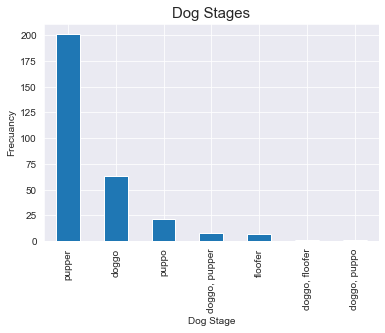

In [93]:
# plot dog stages
df['dog_stage'].value_counts().plot(kind = 'bar');
plt.ylabel('Frecuancy')
plt.xlabel('Dog Stage')
plt.title('Dog Stages', size=15);

In [94]:
# get dog stage and breed associated with the most favourited tweet
fav_max = df.favorite_count.max()
df[df['favorite_count'] == fav_max][['dog_stage', 'dog_breed']]

,dog_stage,dog_breed
306,puppo,Lakeland_terrier


In [95]:
# get dog stage and breed associated with the most retweeted tweet
ret_max = df.retweet_count.max()
df[df['retweet_count'] == ret_max][['dog_stage', 'dog_breed']]

,dog_stage,dog_breed
769,doggo,Labrador_retriever


<a id='conclusions'></a>
### Conclusions

**The most common dog breed is Golden Retriever**

**The most common dog stage is Pupper**

**The dog breed associated with the most liked tweet is Lakeland Terrier while the dog stage associate with it is Puppo**

**The dog breed associated with the most retweeted tweet is Labrador Retriever while the dog stage associate with it is Doggo**